In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('../'))
from matplotlib import pyplot as plt
import numpy as np
from glob import glob
import pydicom as dicom
import dicom_numpy
import SimpleITK as sitk
from matplotlib import pyplot as plt
import matplotlib.patches as patches
from copy import deepcopy
from ct_charachterization import run_third_algorithm_expectation_at_the_beginning, \
    run_third_algorithm_gamma_instead_of_pi, run_third_algorithm_expectation_at_the_end, run_first_algorithm
from ct_charachterization.utility.utils import expand, central_gamma_log_pdf

In [2]:
%matplotlib inline

# Selecting two different tissues

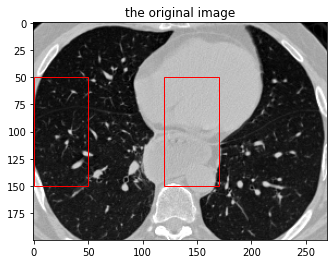

In [3]:
import matplotlib.patches as patches


img = np.load(f'../resources/sample/img.npy')[90:97, 75:275, 50:320]
fig1, ax1 = plt.subplots(1)
ax1.imshow(img[3, :, :], cmap='gray')
plt.title("the original image")
rect1 = patches.Rectangle((0, 50),50,100,linewidth=1,edgecolor='r',facecolor='none')
ax1.add_patch(rect1)
rect2 = patches.Rectangle((120, 50),50,100,linewidth=1,edgecolor='r',facecolor='none')
ax1.add_patch(rect2)
plt.show()

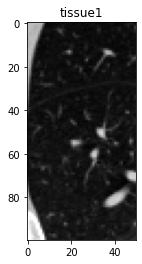

In [4]:
tissue1 = img[:, 50:150, 0:50]
plt.imshow(tissue1[3, :, :], cmap='gray')
plt.title("tissue1")
plt.show()

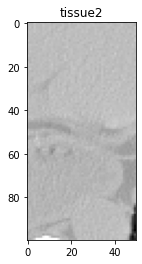

In [5]:
tissue2 = img[:, 50:150, 120:170]
plt.imshow(tissue2[3, :, :], cmap='gray')
plt.title("tissue2")
plt.show()

In [6]:
mu_9 = np.array([-987, -810, -540, -370, -160, 0, 100, 240, 340])
delta = -1030

# Running the first algorithm (Global non-Central Gamma)
We assume the whole 2 crops as a single neighborhood.

/Users/mostafa/PycharmProjects/ncg/ct_charachterization/_first_algorithm_using_log.py:12: RuntimeWarning: invalid value encountered in log
  alpha_optimizer = lambda alpha_var: right_hand_side - (onp.log(alpha_var) - digamma(alpha_var))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


GAMMA:
	min: 2.0461313269668947e-26
	mean: 0.11111111111111113
	max: 0.79275160874333
PI:
	min: 0.043408627892487964
	mean: 0.1111111111111111
	max: 0.3535861632523381
_______________________________
iteration: 1, error: 0.12501617232938292
_______________________________
GAMMA:
	min: 2.1820503689344208e-26
	mean: 0.1111111111111111
	max: 0.760933664019449
PI:
	min: 0.043408627892487964
	mean: 0.1111111111111111
	max: 0.3535861632523381
_______________________________
iteration: 2, error: 0.0
_______________________________
GAMMA:
	min: 2.1820503689344208e-26
	mean: 0.1111111111111111
	max: 0.760933664019449
PI:
	min: 0.013029568644622775
	mean: 0.1111111111111111
	max: 0.645052281441607
_______________________________
iteration: 3, error: 0.20231369765980056
_______________________________
GAMMA:
	min: 1.7413863807608886e-26
	mean: 0.1111111111111111
	max: 0.8951082762132002
PI:
	min: 0.013029568644622775
	mean: 0.1111111111111111
	max: 0.645052281441607
______________________________

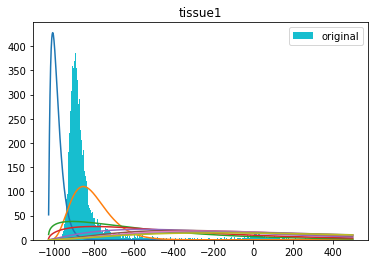

In [7]:
global_theta, global_gamma = run_first_algorithm(tissue1, mu_9, delta=delta, neighborhood_size=0, max_iter=10, tol=-1,
                                                     non_central=True)
global_alpha = global_theta[1, ...]
global_beta = global_theta[2, ...]
for j in range(len(mu_9)):
    wanted_alpha = global_alpha[j, ...]
    wanted_beta = global_beta[j, ...]
    xs = np.arange(delta + 1, 500, 1) - delta
    ys = 25000 * np.exp(central_gamma_log_pdf(xs, wanted_alpha, wanted_beta).ravel())
    plt.plot(xs + delta, ys, '-')
flat1 = tissue1.flatten()
plt.hist(flat1, bins=list(np.arange(-1030, 500, 1)), label='original')
plt.legend(loc='upper right')
plt.title("tissue1")
plt.show()

On each iteration, we can seen the min, mean, and max values over the whole matrices of probabilities - The prior probability (PI) and the posterior probability (GAMMA). After resolving numerical issues, we do not see any zeros (Also mean value always should be 0.111...., because we have 9 components the mean will be 1/9).

/Users/mostafa/PycharmProjects/ncg/ct_charachterization/_first_algorithm_using_log.py:12: RuntimeWarning: invalid value encountered in log
  alpha_optimizer = lambda alpha_var: right_hand_side - (onp.log(alpha_var) - digamma(alpha_var))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


GAMMA:
	min: 2.0461313269668947e-26
	mean: 0.1111111111111111
	max: 0.5454544664835674
PI:
	min: 0.00013967691772977383
	mean: 0.1111111111111111
	max: 0.16288884399384593
_______________________________
iteration: 1, error: 0.9008911119553777
_______________________________
GAMMA:
	min: 4.2156720892899376e-120
	mean: 0.1111111111111111
	max: 0.8558473900882755
PI:
	min: 0.00013967691772977383
	mean: 0.1111111111111111
	max: 0.16288884399384593
_______________________________
iteration: 2, error: 9.096396319015831e-14
_______________________________
GAMMA:
	min: 4.215672089593553e-120
	mean: 0.11111111111111113
	max: 0.8558473900882755
PI:
	min: 1.2588736061775122e-06
	mean: 0.1111111111111111
	max: 0.3761630907284296
_______________________________
iteration: 3, error: 0.7115781364230427
_______________________________
GAMMA:
	min: 0.0
	mean: 0.1111111111111111
	max: 0.8898957546398845
PI:
	min: 1.258873606177514e-06
	mean: 0.11111111111111113
	max: 0.3761630907284432
________________

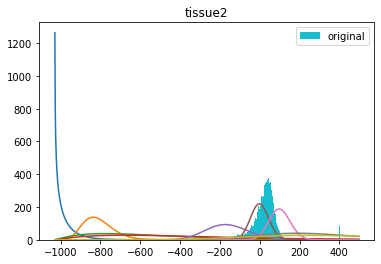

In [8]:
global_theta, global_gamma = run_first_algorithm(tissue2, mu_9, delta=delta, neighborhood_size=0, max_iter=10, tol=-1,
                                                     non_central=True)
global_alpha = global_theta[1, ...]
global_beta = global_theta[2, ...]
for j in range(len(mu_9)):
    wanted_alpha = global_alpha[j, ...]
    wanted_beta = global_beta[j, ...]
    xs = np.arange(delta + 1, 500, 1) - delta
    ys = 25000 * np.exp(central_gamma_log_pdf(xs, wanted_alpha, wanted_beta).ravel())
    plt.plot(xs + delta, ys, '-')
flat2 = tissue2.flatten()
plt.hist(flat2, bins=list(np.arange(-1030, 500, 1)), label='original')
plt.legend(loc='upper right')
plt.title("tissue2")
plt.show()


# This is cool
At least, we know that the algorithm works fine, and on the different types of tissues, it can model the distribution.

But! There is a problem with the second tissue. The blue and orange lines act kinda weird. 
But maybe, it is because they are too close to shifted zero (we have shifted x=0 using delta=-1030 to x=-1030, and the mean of the first two components are very close to this value; -987 and -810). Looking at the plots below gives the idea about what I am trying to say:

![](../resources/figs/gamma_exp1.png)

![](../resources/figs/gamma_exp2.png)

![](../resources/figs/gamma_exp3.png)

# So
It is kina confusing! Most of the tissue2's voxels are between -200 and 200. why the pdf of the blue line acts like that? Humm, maybe it is because its integral from zero to +inf should be 1, and its mean is too close to delta.

But, maybe we can make the situation better by making a distance between the delta and the mean value of the first component. I am going to set delta=-10,000

In [9]:
delta = -10000

GAMMA:
	min: 0.10945512390864993
	mean: 0.1111111111111111
	max: 0.11199847670471923
PI:
	min: 0.11023090303974623
	mean: 0.1111111111111111
	max: 0.11169803049812321
_______________________________
iteration: 1, error: 0.9967545925250707
_______________________________
GAMMA:
	min: 3.192554496661671e-06
	mean: 0.1111111111111111
	max: 0.3021746642896338
PI:
	min: 0.11023090303974623
	mean: 0.1111111111111111
	max: 0.11169803049812321
_______________________________
iteration: 2, error: 5.564815624114821e-13
_______________________________
GAMMA:
	min: 3.1925544966617392e-06
	mean: 0.1111111111111111
	max: 0.3021746642895726
PI:
	min: 0.04436576276951489
	mean: 0.1111111111111111
	max: 0.27394125044978934
_______________________________
iteration: 3, error: 4.571829820289888
_______________________________
GAMMA:
	min: 6.488143817182728e-34
	mean: 0.11111111111111109
	max: 0.7125060976953678
PI:
	min: 0.044365762769512325
	mean: 0.1111111111111111
	max: 0.27394125044976814
____________

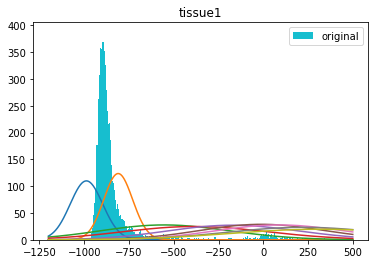

In [10]:
global_theta, global_gamma = run_first_algorithm(tissue1, mu_9, delta=delta, neighborhood_size=0, max_iter=10, tol=-1,
                                                     non_central=True)
global_alpha = global_theta[1, ...]
global_beta = global_theta[2, ...]
for j in range(len(mu_9)):
    wanted_alpha = global_alpha[j, ...]
    wanted_beta = global_beta[j, ...]
    xs = np.arange(-1200, 500, 1) - delta
    ys = 25000 * np.exp(central_gamma_log_pdf(xs, wanted_alpha, wanted_beta).ravel())
    plt.plot(xs + delta, ys, '-')
flat1 = tissue1.flatten()
plt.hist(flat1, bins=list(np.arange(-1030, 500, 1)), label='original')
plt.legend(loc='upper right')
plt.title("tissue1")
plt.show()

GAMMA:
	min: 0.10945512390864993
	mean: 0.11111111111111113
	max: 0.11194508781114561
PI:
	min: 0.11015077629947409
	mean: 0.1111111111111111
	max: 0.11143122666784028
_______________________________
iteration: 1, error: 1.5145026223670905
_______________________________
GAMMA:
	min: 1.1823131671136898e-31
	mean: 0.11111111111111113
	max: 0.4074722834355486
PI:
	min: 0.11015077629947409
	mean: 0.1111111111111111
	max: 0.11143122666784028
_______________________________
iteration: 2, error: 5.2377883534520445e-14
_______________________________
GAMMA:
	min: 1.1823131671136898e-31
	mean: 0.11111111111111113
	max: 0.4074722834355508
PI:
	min: 0.020809431775514965
	mean: 0.1111111111111111
	max: 0.34688424162767156
_______________________________
iteration: 3, error: 1.761353144050605
_______________________________
GAMMA:
	min: 3.5317315419609217e-91
	mean: 0.1111111111111111
	max: 0.7774775064553012
PI:
	min: 0.020809431775515103
	mean: 0.1111111111111111
	max: 0.34688424162767395
______

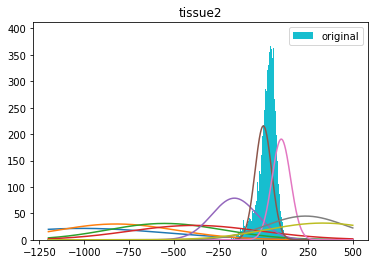

In [11]:
global_theta, global_gamma = run_first_algorithm(tissue2, mu_9, delta=delta, neighborhood_size=0, max_iter=10, tol=-1,
                                                     non_central=True)
global_alpha = global_theta[1, ...]
global_beta = global_theta[2, ...]
for j in range(len(mu_9)):
    wanted_alpha = global_alpha[j, ...]
    wanted_beta = global_beta[j, ...]
    xs = np.arange(-1200, 500, 1) - delta
    ys = 25000 * np.exp(central_gamma_log_pdf(xs, wanted_alpha, wanted_beta).ravel())
    plt.plot(xs + delta, ys, '-')
flat2 = tissue2.flatten()
plt.hist(flat2, bins=list(np.arange(-1030, 500, 1)), label='original')
plt.legend(loc='upper right')
plt.title("tissue2")
plt.show()


# Better!
So the delta value really matters! It would be better for fitting if we choose a big negative delta.
# Question 1
Do you think it is ok to do this? I mean, the result is better for fitting the distribution, but I am just acting like a brute force algorithm and trying all the possible ways cause it is not stated in the paper that this would help. (Actually, as you know, the paper is too incomplete)

# Stabilization
Here are some minor improvements:
1. I am using 3d version
2. neighborhood shape is 7\*7\*7

Running the algorithm for tissue1, and using the below approach to deal with paper's incompleteness:
![](../resources/figs/beg.png)

/Users/mostafa/PycharmProjects/ncg/ct_charachterization/utility/utils.py:146: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  big_img[big_slices] = small_img[small_slices]


GAMMA:
	min: 0.10945512390864993
	mean: 0.1111111111111113
	max: 0.11199847670471923
PI:
	min: 0.1101953448190573
	mean: 0.1111111111111111
	max: 0.11173440432514549
_______________________________
iteration: 1, error: 1.0081580977966034
_______________________________
GAMMA:
	min: 2.336581822420323e-09
	mean: 0.1111111111111111
	max: 0.3440916824024479
PI:
	min: 0.1101953448190573
	mean: 0.1111111111111111
	max: 0.11173440432514549
_______________________________
iteration: 2, error: 3.106556799933794e-12
_______________________________
GAMMA:
	min: 2.3365818222502647e-09
	mean: 0.1111111111111111
	max: 0.3440916824026964
PI:
	min: 0.03886346372637632
	mean: 0.1111111111111111
	max: 0.3092160998966552
_______________________________
iteration: 3, error: 3.1791837858193492
_______________________________
GAMMA:
	min: 5.46910661423704e-38
	mean: 0.1111111111111113
	max: 0.7601563102633281
PI:
	min: 0.03886346372639507
	mean: 0.11111111111111109
	max: 0.309216099896826
__________________

/Users/mostafa/PycharmProjects/ncg/ct_charachterization/_first_algorithm_using_log.py:92: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  theta_before_expansion = onp.array([initial_pi, initial_alpha, initial_beta])
/Users/mostafa/PycharmProjects/ncg/ct_charachterization/_first_algorithm_using_log.py:12: RuntimeWarning: invalid value encountered in log
  alpha_optimizer = lambda alpha_var: right_hand_side - (onp.log(alpha_var) - digamma(alpha_var))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


GAMMA:
	min: 2.1727393690969408e-47
	mean: 0.11111111111111104
	max: 0.7668962965296479
PI:
	min: 1.6469737374308012e-06
	mean: 0.1111111111111111
	max: 0.548402612680987
_______________________________
iteration: 1, error: 0.3929494753381974
_______________________________
GAMMA:
	min: 1.6612901632923067e-117
	mean: 0.11111111111111126
	max: 0.9365654058689461
PI:
	min: 1.6469737374308012e-06
	mean: 0.1111111111111111
	max: 0.548402612680987
_______________________________
iteration: 2, error: 1.4194408302059e-11
_______________________________
GAMMA:
	min: 1.6612901632923067e-117
	mean: 0.11111111111111127
	max: 0.9365654058689461
PI:
	min: 5.5433249859895474e-11
	mean: 0.1111111111111111
	max: 0.8180757481211465
_______________________________
iteration: 3, error: 0.0711734557335074
_______________________________
GAMMA:
	min: 2.077760955672721e-154
	mean: 0.11111111111111098
	max: 0.9732408589739688
PI:
	min: 5.5433249859895474e-11
	mean: 0.11111111111111109
	max: 0.818075748121146

/Users/mostafa/PycharmProjects/ncg/ct_charachterization/_third_algorithm.py:131: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  y_stab = (constant_c * (onp.sqrt(y[y_slices]) - first_local_sample_conditioned_moment) / onp.sqrt(


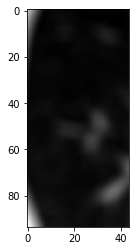

In [12]:
resul = run_third_algorithm_expectation_at_the_beginning(y=tissue1, mu=mu_9, neighborhood_size=7, delta=delta,
                                                         max_iter=10, tol=-1, constant_c=2, non_central=True)
plt.imshow(resul[0, :, :], cmap='gray')
plt.show()

As you can see, after iteration 7, some values become zero. But, if you look at the previous one, the min value is `6.346167187880914e-162`, so I think it is reasonable to become zero.

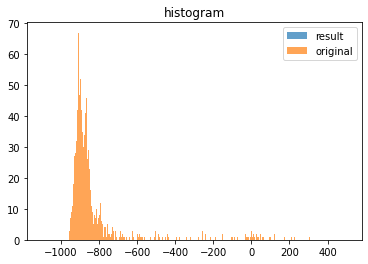

In [13]:
origi = tissue1[3:-3, 3:-3]
flat_resul = resul.flatten() - 1030
flat_origi = origi.flatten()
ax = plt.subplot(1, 1, 1)
bins = list(np.arange(-1100, 500, 1))
ax.hist(flat_resul, bins=bins, alpha=0.7, label='result')
ax.hist(flat_origi, bins=bins, alpha=0.7, label='original')
plt.legend(loc='upper right')
plt.title("histogram")
plt.show()

Now, trying the second approach:
![](../resources/figs/end.png)

GAMMA:
	min: 0.10945512390864993
	mean: 0.1111111111111113
	max: 0.11199847670471923
PI:
	min: 0.1101953448190573
	mean: 0.1111111111111111
	max: 0.11173440432514549
_______________________________
iteration: 1, error: 1.0081580977966034
_______________________________
GAMMA:
	min: 2.336581822420323e-09
	mean: 0.1111111111111111
	max: 0.3440916824024479
PI:
	min: 0.1101953448190573
	mean: 0.1111111111111111
	max: 0.11173440432514549
_______________________________
iteration: 2, error: 3.106556799933794e-12
_______________________________
GAMMA:
	min: 2.3365818222502647e-09
	mean: 0.1111111111111111
	max: 0.3440916824026964
PI:
	min: 0.03886346372637632
	mean: 0.1111111111111111
	max: 0.3092160998966552
_______________________________
iteration: 3, error: 3.1791837858193492
_______________________________
GAMMA:
	min: 5.46910661423704e-38
	mean: 0.1111111111111113
	max: 0.7601563102633281
PI:
	min: 0.03886346372639507
	mean: 0.11111111111111109
	max: 0.309216099896826
__________________

/Users/mostafa/PycharmProjects/ncg/ct_charachterization/_third_algorithm.py:89: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  first_local_sample_conditioned_moment[j, ...]) / onp.sqrt(


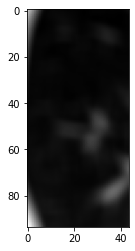

In [14]:
resul = run_third_algorithm_expectation_at_the_end(y=tissue1, mu=mu_9, neighborhood_size=6, delta=delta,
                                                   max_iter=10, tol=-1, constant_c=2, non_central=True)
plt.imshow(resul[0, :, :], cmap='gray')
plt.show()

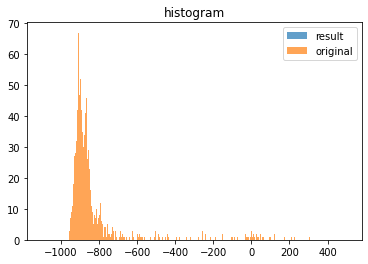

In [15]:
origi = tissue1[3:-3, 3:-3]
flat_resul = resul.flatten() - 1030
flat_origi = origi.flatten()
ax = plt.subplot(1, 1, 1)
bins = list(np.arange(-1100, 500, 1))
ax.hist(flat_resul, bins=bins, alpha=0.7, label='result')
ax.hist(flat_origi, bins=bins, alpha=0.7, label='original')
plt.legend(loc='upper right')
plt.title("histogram")
plt.show()

Now, the approach that was working with no true explanation (and I just found it with brute-forcing):

![](../resources/figs/gam_pi.png)

GAMMA:
	min: 0.10945512390864993
	mean: 0.1111111111111113
	max: 0.11199847670471923
PI:
	min: 0.1101953448190573
	mean: 0.1111111111111111
	max: 0.11173440432514549
_______________________________
iteration: 1, error: 1.0081580977966034
_______________________________
GAMMA:
	min: 2.336581822420323e-09
	mean: 0.1111111111111111
	max: 0.3440916824024479
PI:
	min: 0.1101953448190573
	mean: 0.1111111111111111
	max: 0.11173440432514549
_______________________________
iteration: 2, error: 3.106556799933794e-12
_______________________________
GAMMA:
	min: 2.3365818222502647e-09
	mean: 0.1111111111111111
	max: 0.3440916824026964
PI:
	min: 0.03886346372637632
	mean: 0.1111111111111111
	max: 0.3092160998966552
_______________________________
iteration: 3, error: 3.1791837858193492
_______________________________
GAMMA:
	min: 5.46910661423704e-38
	mean: 0.1111111111111113
	max: 0.7601563102633281
PI:
	min: 0.03886346372639507
	mean: 0.11111111111111109
	max: 0.309216099896826
__________________

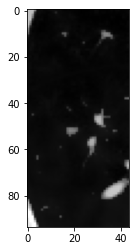

In [16]:
resul = run_third_algorithm_gamma_instead_of_pi(y=tissue1, mu=mu_9, neighborhood_size=6, delta=delta,
                                                max_iter=10, tol=-1, constant_c=2, non_central=True)
plt.imshow(resul[0, :, :], cmap='gray')
plt.show()

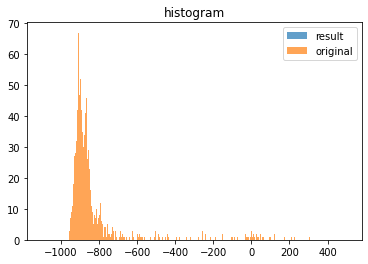

In [17]:
origi = tissue1[3:-3, 3:-3]
flat_resul = resul.flatten() - 1030
flat_origi = origi.flatten()
ax = plt.subplot(1, 1, 1)
bins = list(np.arange(-1100, 500, 1))
ax.hist(flat_resul, bins=bins, alpha=0.7, label='result')
ax.hist(flat_origi, bins=bins, alpha=0.7, label='original')
plt.legend(loc='upper right')
plt.title("histogram")
plt.show()

# About using JAX
JAX has some limitations, and we cannot use NumPy's SciPy with it. And the SciPy of their own is a work-in-progress project. I was trying to implement it but found out that I should get my hands dirty with the whole Jax project (and I was going to learn about it for a couple of days, but now, I think it takes time)

![](../resources/figs/issue.png)

# Question 2
Do you think it would be beneficial if I contribute to the JAX project and then use it for our project?

# Question 3
At this point, I feel a little bit stuck, and I do not know what I should do for the next steps to make one of the first two stabilization algorithms work (the third one works, with no reason). Do you have any idea? Or, do you think asking the authors would help?

# Thank you for your time :)